# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

# Data Collection

In [4]:
df = pd.read_csv('G:\Technologies\DATA SCIENCE\ExcelR\Assignments\PART-1\Simple Linear Regression\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
y = df.iloc[:,1:]
x = df.iloc[:,:-1]

In [8]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


# Data Visualization

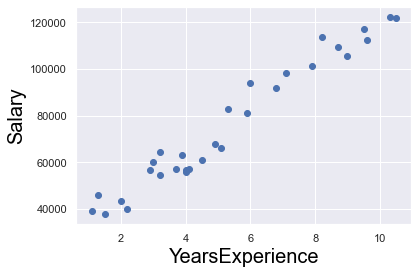

In [9]:
plt.scatter(x,y)
plt.xlabel('YearsExperience',fontsize=20,color='black')
plt.ylabel('Salary',fontsize=20,color='black')
plt.show()

# Data Wrangling

In [10]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Creating Training & Test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

# Model Building :

### SciKit Learn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
Regression_Model = LinearRegression()

In [16]:
Regression_Model.fit(x_train,y_train)

LinearRegression()

In [30]:
x_test

,YearsExperience
11,4.0
21,7.1
28,10.3
15,4.9
20,6.8
25,9.0


In [17]:
y_pred = Regression_Model.predict(x_test)
y_pred 

array([[ 64027.97387518],
       [ 93383.75526891],
       [123686.49735277],
       [ 72550.62008627],
       [ 90542.87319855],
       [111376.0083812 ]])

In [18]:
from sklearn.metrics import r2_score
Score = r2_score(y_test,y_pred)
Score

0.9504404484884268

### StatsModel - Ordinary Least Square

In [19]:
X = sm.add_constant(x)
OLS_Model = sm.OLS(y,X).fit()

In [20]:
OLS_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        11:10:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Line

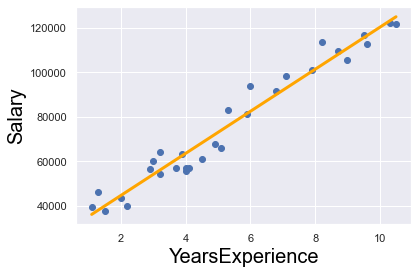

In [21]:
plt.scatter(x,y)
yhat = 9449.9623*x + 2.579e+04
fig = plt.plot(x,yhat,lw=3,c='orange',label='regression line')
plt.xlabel('YearsExperience',fontsize=20,color='black')
plt.ylabel('Salary',fontsize=20,color='black')
plt.show()

In [22]:
import pickle

In [25]:
pickle.dump(Regression_Model, open('Regression_Model.pkl', 'wb'))

In [26]:
pickle.load(open('Regression_Model.pkl','rb'))

LinearRegression()